# Club's membership analysis 

#### 1/ Problem Definition
Goal:

- Define the characteristics of customers who cancel membership
- Predict membership status for club members in test file
- Suggest actions to improve business 

#### 2/ Data cleaning & processing
- View data info
- Fill missing value
  + Fill mode value for members Gender, Marital status and Occupation
  + Fill median value for imputing missing Annual income of member
- Remove outliers (see at Modelling part)

#### 3/ Detail analysis (Comments below)

3.1 Categorical features
3.2 Numerical features

Ranking the drivers for membership cancellation (based on Correlation matrix)

- Package B did not satisfy customers' needs 
- Age: the club's vibe may not suitable for the youth
- Marital status & Gender: The activities of the club seemed not attractive to both Single and Marriage men
- Payment mode: Annual payment did not have competitive promotion to keep the customers' loyalty

#### 4/ Action suggest
- Age: Implement surveys to customers below 48, especially 30-50 to check their satisfaction, reason for leaving and other feedbacks on services
- Package: 
    + Recheck and enhance terms and conditions of Type B, especially those had Standard and Diamond to consider proper services for customers
    + Check again the package price to offer suitable ones for different group of customers' income
- Payment mode: Offer more benefits or discount for annual package to retain customers


## 2. Data Pre-processing

### Step 1: Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import category_encoders as ce 

### Step 2: Import files

In [3]:
train_df = pd.read_excel('C:/Users/ASUS/OneDrive/Documents/Python/club_churn_train.xlsx')
test_df = pd.read_excel('C:/Users/ASUS/OneDrive/Documents/Python/club_churn_test.xlsx')

### Step 3: Evaluate data structure

In [4]:
train_df.head(5)

,ID,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,START_DATE,END_DATE,MEMBERSHIP_STATUS
0,5944,A05948,12,100000.00,NaN,M,399996.0,1.0,TYPE-B,43,2,ANNUAL,1194400,20110929,20121119.0,CANCELLED
1,5487,A05490,17,100514.23,M,F,549996.0,1.0,TYPE-A,40,2,ANNUAL,739244,20110311,20120410.0,CANCELLED
2,9089,A09094,12,100000.80,M,M,1299996.0,1.0,TYPE-B,40,2,MONTHLY,1341388,20130625,NaN,INFORCE
3,5338,A05341,12,100000.99,M,M,500004.0,1.0,TYPE-B,50,3,ANNUAL,261533,20110203,20120328.0,CANCELLED
4,8163,A08168,12,200001.60,NaN,M,499992.0,2.0,TYPE-B,45,2,MONTHLY,1355055,20130228,20130727.0,CANCELLED


In [5]:
# Show train's information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9325 non-null   int64  
 1   MEMBERSHIP_NUMBER      9325 non-null   object 
 2   MEMBERSHIP_TERM_YEARS  9325 non-null   int64  
 3   ANNUAL_FEES            9325 non-null   float64
 4   MEMBER_MARITAL_STATUS  6942 non-null   object 
 5   MEMBER_GENDER          8763 non-null   object 
 6   MEMBER_ANNUAL_INCOME   7716 non-null   float64
 7   MEMBER_OCCUPATION_CD   9284 non-null   float64
 8   MEMBERSHIP_PACKAGE     9325 non-null   object 
 9   MEMBER_AGE_AT_ISSUE    9325 non-null   int64  
 10  ADDITIONAL_MEMBERS     9325 non-null   int64  
 11  PAYMENT_MODE           9325 non-null   object 
 12  AGENT_CODE             9325 non-null   object 
 13  START_DATE             9325 non-null   int64  
 14  END_DATE               2830 non-null   float64
 15  MEMB

In [6]:
# Show test's information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1037 non-null   int64  
 1   MEMBERSHIP_NUMBER      1037 non-null   object 
 2   MEMBERSHIP_TERM_YEARS  1037 non-null   int64  
 3   ANNUAL_FEES            1037 non-null   float64
 4   MEMBER_MARITAL_STATUS  823 non-null    object 
 5   MEMBER_GENDER          988 non-null    object 
 6   MEMBER_ANNUAL_INCOME   892 non-null    float64
 7   MEMBER_OCCUPATION_CD   1035 non-null   float64
 8   MEMBERSHIP_PACKAGE     1037 non-null   object 
 9   MEMBER_AGE_AT_ISSUE    1037 non-null   int64  
 10  ADDITIONAL_MEMBERS     1037 non-null   int64  
 11  PAYMENT_MODE           1037 non-null   object 
 12  AGENT_CODE             1037 non-null   int64  
 13  START_DATE             1037 non-null   int64  
 14  MEMBERSHIP_STATUS      0 non-null      float64
dtypes: f

In [7]:
train_df.describe()

,ID,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE,END_DATE
count,9325.000000,9325.000000,9.325000e+03,7.716000e+03,9284.000000,9325.000000,9325.000000,9.325000e+03,2.830000e+03
mean,5197.269812,29.564611,1.787982e+05,1.491272e+06,1.718871,46.856836,1.409866,2.010839e+07,2.011403e+07
std,2986.617719,22.554682,2.688161e+05,1.852630e+07,1.463633,13.960745,1.146661,1.716381e+04,1.375779e+04
min,0.000000,9.000000,9.999999e+04,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,2612.000000,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.010011e+07,2.010123e+07
50%,5209.000000,19.000000,1.184782e+05,5.499960e+05,1.000000,46.000000,1.000000,2.011011e+07,2.011113e+07
75%,7790.000000,37.000000,1.950001e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013013e+07
max,10361.000000,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [8]:
# Count null rows train
train_df.isnull().sum()

ID                          0
MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2383
MEMBER_GENDER             562
MEMBER_ANNUAL_INCOME     1609
MEMBER_OCCUPATION_CD       41
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
START_DATE                  0
END_DATE                 6495
MEMBERSHIP_STATUS           0
dtype: int64

In [9]:
# Count null row test
test_df.isnull().sum()

ID                          0
MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS     214
MEMBER_GENDER              49
MEMBER_ANNUAL_INCOME      145
MEMBER_OCCUPATION_CD        2
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
START_DATE                  0
MEMBERSHIP_STATUS        1037
dtype: int64

In [10]:
# Unique values in each categorical variable
train_df.nunique()

ID                       9325
MEMBERSHIP_NUMBER        9325
MEMBERSHIP_TERM_YEARS      92
ANNUAL_FEES              2904
MEMBER_MARITAL_STATUS       4
MEMBER_GENDER               2
MEMBER_ANNUAL_INCOME      741
MEMBER_OCCUPATION_CD        6
MEMBERSHIP_PACKAGE          2
MEMBER_AGE_AT_ISSUE        89
ADDITIONAL_MEMBERS          4
PAYMENT_MODE                5
AGENT_CODE               4025
START_DATE               1276
END_DATE                 1008
MEMBERSHIP_STATUS           2
dtype: int64

In [11]:
train_df['PAYMENT_MODE'].unique()

array(['ANNUAL', 'MONTHLY', 'SEMI-ANNUAL', 'QUARTERLY', 'SINGLE-PREMIUM'],
      dtype=object)

### Step 4: Check variable distribution

In [12]:
# To see target variable distribution
train_df['MEMBERSHIP_STATUS'].value_counts(normalize=True).to_frame()

,MEMBERSHIP_STATUS
INFORCE,0.696515
CANCELLED,0.303485


In [13]:
# To see marital status distribution
train_df['MEMBER_MARITAL_STATUS'].value_counts(normalize=True).to_frame()

,MEMBER_MARITAL_STATUS
M,0.827859
S,0.147796
W,0.018871
D,0.005474


In [14]:
# To see gender distribution
train_df['MEMBER_GENDER'].value_counts(normalize=True).to_frame()

,MEMBER_GENDER
M,0.750884
F,0.249116


In [15]:
# To see occupation distribution
train_df['MEMBER_OCCUPATION_CD'].value_counts(normalize=True).to_frame()

,MEMBER_OCCUPATION_CD
1.0,0.703899
2.0,0.172555
6.0,0.072167
5.0,0.031452
4.0,0.019819
3.0,0.000108


### Step 5: Clean the dataset

In [16]:
# Change type of Date

train_df['START_DATE'] = pd.to_datetime(train_df.START_DATE) 
train_df['END_DATE'] = pd.to_datetime(train_df.END_DATE)

# train_df['TotalCharges'] = train_df['TotalCharges'].astype("float")

### Step 6: Take care of missing data

In [17]:
# To see the correlation between member annual income and other element -> to consider method to fill missing value
train_df.corr().loc['MEMBER_ANNUAL_INCOME', :].sort_values(ascending=False)

MEMBER_ANNUAL_INCOME     1.000000
ANNUAL_FEES              0.060379
MEMBERSHIP_TERM_YEARS    0.031341
ID                       0.016639
ADDITIONAL_MEMBERS       0.003829
MEMBER_OCCUPATION_CD    -0.005535
MEMBER_AGE_AT_ISSUE     -0.048637
Name: MEMBER_ANNUAL_INCOME, dtype: float64

In [18]:
# Fill missing data
# Consider majority class for Gender, Marital and Occupation
train_df['MEMBER_MARITAL_STATUS']=train_df['MEMBER_MARITAL_STATUS'].fillna(train_df['MEMBER_MARITAL_STATUS'].mode()[0])

In [19]:
train_df['MEMBER_GENDER']=train_df['MEMBER_GENDER'].fillna(train_df['MEMBER_GENDER'].mode()[0])
train_df['MEMBER_OCCUPATION_CD']=train_df['MEMBER_OCCUPATION_CD'].fillna(train_df['MEMBER_OCCUPATION_CD'].mode()[0])

In [20]:
# Consider median value to input missing annual income
train_df['MEMBER_ANNUAL_INCOME']=train_df['MEMBER_ANNUAL_INCOME'].fillna(train_df['MEMBER_ANNUAL_INCOME'].median())

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     9325 non-null   int64         
 1   MEMBERSHIP_NUMBER      9325 non-null   object        
 2   MEMBERSHIP_TERM_YEARS  9325 non-null   int64         
 3   ANNUAL_FEES            9325 non-null   float64       
 4   MEMBER_MARITAL_STATUS  9325 non-null   object        
 5   MEMBER_GENDER          9325 non-null   object        
 6   MEMBER_ANNUAL_INCOME   9325 non-null   float64       
 7   MEMBER_OCCUPATION_CD   9325 non-null   float64       
 8   MEMBERSHIP_PACKAGE     9325 non-null   object        
 9   MEMBER_AGE_AT_ISSUE    9325 non-null   int64         
 10  ADDITIONAL_MEMBERS     9325 non-null   int64         
 11  PAYMENT_MODE           9325 non-null   object        
 12  AGENT_CODE             9325 non-null   object        
 13  STA

In [22]:
train_df.describe()

,ID,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS
count,9325.000000,9325.000000,9.325000e+03,9.325000e+03,9325.000000,9325.000000,9325.000000
mean,5197.269812,29.564611,1.787982e+05,1.328858e+06,1.715710,46.856836,1.409866
std,2986.617719,22.554682,2.688161e+05,1.685591e+07,1.461186,13.960745,1.146661
min,0.000000,9.000000,9.999999e+04,9.996000e+03,1.000000,0.000000,0.000000
25%,2612.000000,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000
50%,5209.000000,19.000000,1.184782e+05,5.499960e+05,1.000000,46.000000,1.000000
75%,7790.000000,37.000000,1.950001e+05,8.899800e+05,2.000000,57.000000,2.000000
max,10361.000000,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000


# 3. Exploratory Data Analysis (EDA)

## 3.1. Correlating categorical features 

#### Observation:

The majority of customers of this club had these characteristics:
1. Male
2. Marriaged
3. Occupation is 1

##### Membership status: 
- Fig 1: Single cancellation rate was highest among all groups. However, Single just accounted for small amount of customers. The majority came from Marriage, which had cancellation rate was nearly one third of the total Marriage population 
- Fig 2: Most customers were male, and its cancellation rate was also higher, nearly one third of the total Male population
- Fig 3: Most customers' occupation was 1, and its cancellation rate was also the highest, nearly one third of the total group 1 population
- Fig 4: Most customers chose Type B, and its cancellation also rate was higher, about 40% of the total Type B population
- Fig 5: Most customers had 0 add-in members, and its cancellation also rate was the highest, nearly one third of the total group 1 population. Other groups had pretty same cancellation rate of around 30%
- Fig 6: Most customers chose annual payment, and its cancellation rate was the highest, nearly one third of the total group 1 population. Other groups had pretty same cancellation rate of around 30%
- Agent code: There were 4025 codes in total, the code which has the highest amount of cancellation is 739255 (46 cancellation). We can see that this feature distribution was too broad. Hence, we can take a look at agent 739255, but no further focus needed

#### Target Variable: MEMBERSHIP_STATUS

In [23]:
train_df['MEMBERSHIP_STATUS'].value_counts().to_frame()

,MEMBERSHIP_STATUS
INFORCE,6495
CANCELLED,2830


In [24]:
train_df['MEMBERSHIP_STATUS'].value_counts(normalize=True).to_frame()

,MEMBERSHIP_STATUS
INFORCE,0.696515
CANCELLED,0.303485


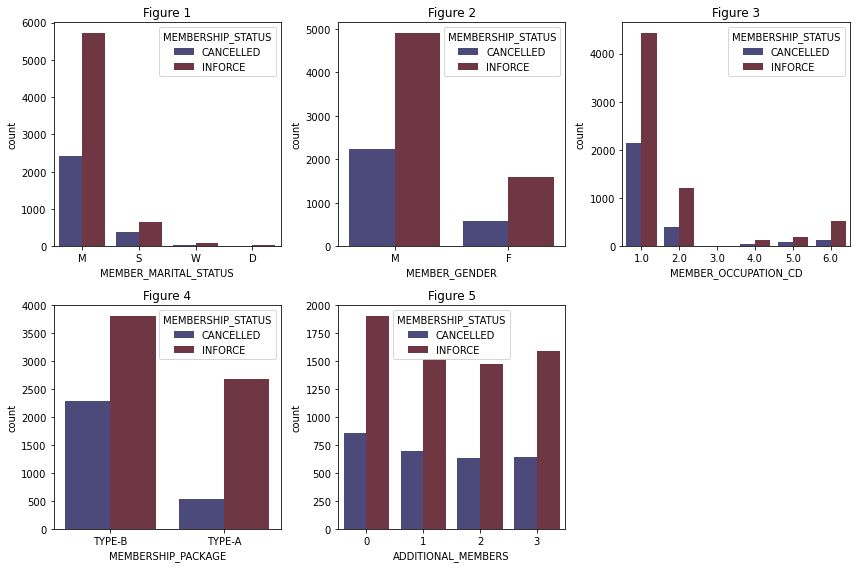

In [25]:
# Draw charts for categorical features in relation with membership status

cols = ["MEMBER_MARITAL_STATUS", "MEMBER_GENDER", "MEMBER_OCCUPATION_CD", "MEMBERSHIP_PACKAGE", "ADDITIONAL_MEMBERS"]
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for r in range (0, n_rows):
    for c in range (0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='MEMBERSHIP_STATUS', palette='icefire', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}")
            
ax.flat[-1].set_visible(False) 

plt.tight_layout()


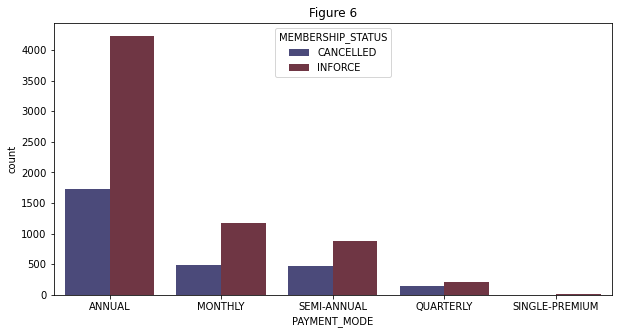

In [26]:
# Draw chart of relationship between payment mode and membership status
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='PAYMENT_MODE', hue='MEMBERSHIP_STATUS', palette = 'icefire').set(title='Figure 6')
plt.show()

In [27]:
# To count number of unique values in Agent code column
n = len(pd.unique(train_df['AGENT_CODE']))
n

4025

In [28]:
# To find the mode value of Agent code
agentcode_mode = train_df.groupby(['MEMBERSHIP_STATUS'])['AGENT_CODE'].agg(lambda x:x.value_counts().index[0])
agentcode_mode

MEMBERSHIP_STATUS
CANCELLED    739255
INFORCE      343344
Name: AGENT_CODE, dtype: int64

In [29]:
# To count the number of cancellation relating to Agent code 739255
train_df[train_df['AGENT_CODE'] == 739255].count()

ID                       46
MEMBERSHIP_NUMBER        46
MEMBERSHIP_TERM_YEARS    46
ANNUAL_FEES              46
MEMBER_MARITAL_STATUS    46
MEMBER_GENDER            46
MEMBER_ANNUAL_INCOME     46
MEMBER_OCCUPATION_CD     46
MEMBERSHIP_PACKAGE       46
MEMBER_AGE_AT_ISSUE      46
ADDITIONAL_MEMBERS       46
PAYMENT_MODE             46
AGENT_CODE               46
START_DATE               46
END_DATE                 30
MEMBERSHIP_STATUS        46
dtype: int64

## 3.2. EDA for numerical features 

#### Comments:
##### 1. Member age at issue
- The majority number of cancellation came from the age 30-50
- The younger the customers, the higher rate of cancellation

##### 2. Annual fees
- The majority number of cancellation came from Standard group 
- Both Standard and Diamond groups had cancellation rate of one third of group population
- The 2 remaining groups had cancellation rate of one fourth of group population

##### 3. Member annual income
- The majority number of cancellation came from Poor group 
- 3 groups Poor, Medium and Rich had cancellation rate of around one third of group population
- Wealthy group had cancellation rate of one fourth of group population

##### 4. Combine package, fees & income
- The fee of packages were not properly personalize to customers

### 3.2.1 MEMBER AGE AT ISSUE

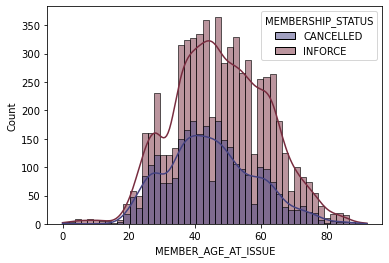

In [30]:
# Draw histogram of age in relation with membership status
sns.histplot(data=train_df, x='MEMBER_AGE_AT_ISSUE', hue = 'MEMBERSHIP_STATUS', bins = 50, palette = 'icefire', kde=True);

### 3.2.2 ANNUAL FEES

In [31]:
train_df['ANNUAL_FEES'].describe()

count    9.325000e+03
mean     1.787982e+05
std      2.688161e+05
min      9.999999e+04
25%      1.000000e+05
50%      1.184782e+05
75%      1.950001e+05
max      1.010000e+07
Name: ANNUAL_FEES, dtype: float64

In [32]:
# To group Annual fees into 4 groups using quantile cut
pd.qcut(train_df['ANNUAL_FEES'], 4)

0         (99999.989, 100000.0]
1         (100000.0, 118478.16]
2         (100000.0, 118478.16]
3         (100000.0, 118478.16]
4       (195000.14, 10100000.0]
                 ...           
9320      (100000.0, 118478.16]
9321      (100000.0, 118478.16]
9322    (195000.14, 10100000.0]
9323      (99999.989, 100000.0]
9324      (100000.0, 118478.16]
Name: ANNUAL_FEES, Length: 9325, dtype: category
Categories (4, interval[float64, right]): [(99999.989, 100000.0] < (100000.0, 118478.16] < (118478.16, 195000.14] < (195000.14, 10100000.0]]

<AxesSubplot:xlabel='ANNUAL_FEES', ylabel='count'>

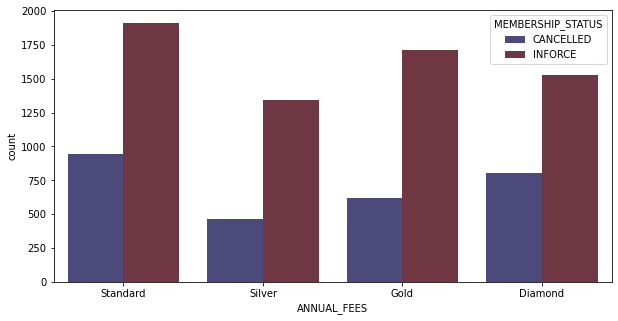

In [33]:
# Draw chart base on group of Annual fees
plt.figure(figsize=(10,5))
fare_categories = ['Standard', 'Silver', 'Gold', 'Diamond']
grouping = pd.qcut(train_df['ANNUAL_FEES'], 4, labels=fare_categories)

sns.countplot(x=grouping, hue=train_df['MEMBERSHIP_STATUS'], palette='icefire')

### 3.2.3 MEMBER ANNUAL INCOME

In [34]:
train_df['MEMBER_ANNUAL_INCOME'].describe()

count    9.325000e+03
mean     1.328858e+06
std      1.685591e+07
min      9.996000e+03
25%      3.999960e+05
50%      5.499960e+05
75%      8.899800e+05
max      1.000000e+09
Name: MEMBER_ANNUAL_INCOME, dtype: float64

In [35]:
# To group member annual income into 4 groups using quantile cut
pd.qcut(train_df['MEMBER_ANNUAL_INCOME'], 4)

0          (9995.999, 399996.0]
1          (399996.0, 549996.0]
2       (889980.0, 999999996.0]
3          (399996.0, 549996.0]
4          (399996.0, 549996.0]
                 ...           
9320       (549996.0, 889980.0]
9321    (889980.0, 999999996.0]
9322       (9995.999, 399996.0]
9323       (9995.999, 399996.0]
9324       (549996.0, 889980.0]
Name: MEMBER_ANNUAL_INCOME, Length: 9325, dtype: category
Categories (4, interval[float64, right]): [(9995.999, 399996.0] < (399996.0, 549996.0] < (549996.0, 889980.0] < (889980.0, 999999996.0]]

<AxesSubplot:xlabel='MEMBER_ANNUAL_INCOME', ylabel='count'>

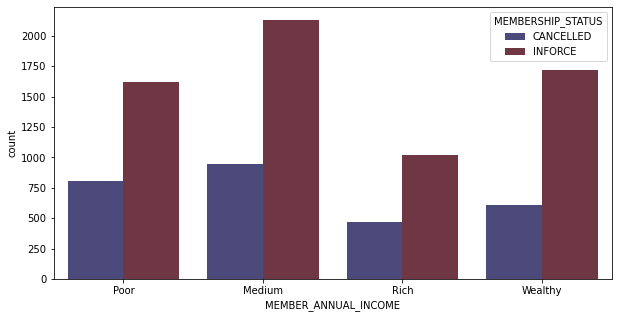

In [36]:
# Draw chart base on groups
plt.figure(figsize=(10,5))
income_categories = ['Poor', 'Medium', 'Rich', 'Wealthy']
grouping_income = pd.qcut(train_df['MEMBER_ANNUAL_INCOME'], 4, labels=income_categories)

sns.countplot(x=grouping_income, hue=train_df['MEMBERSHIP_STATUS'], palette='icefire')

In [37]:
# Create new column Grouping member annual income
labels = ['Poor', 'Medium', 'Rich', 'Wealthy']
train_df['MEMBER_ANNUAL_INCOME_bin'] = pd.qcut(train_df['MEMBER_ANNUAL_INCOME'], 4, labels=labels)

In [38]:
# Create new column Grouping member annual fees
labels = ['Standard', 'Silver', 'Gold', 'Diamond']
train_df['ANNUAL_FEES_bin'] = pd.qcut(train_df['ANNUAL_FEES'], 4, labels=labels)

In [39]:
# To see the distribution of membership status by package, annual fee & income
pd.set_option('display.max_rows', None)
countmap = train_df.groupby(['MEMBERSHIP_PACKAGE','MEMBERSHIP_STATUS', 'ANNUAL_FEES_bin', 'MEMBER_ANNUAL_INCOME_bin'])['MEMBERSHIP_NUMBER'].count()
print(countmap)

MEMBERSHIP_PACKAGE  MEMBERSHIP_STATUS  ANNUAL_FEES_bin  MEMBER_ANNUAL_INCOME_bin
TYPE-A              CANCELLED          Standard         Poor                          0
                                                        Medium                        0
                                                        Rich                          0
                                                        Wealthy                       0
                                       Silver           Poor                         62
                                                        Medium                       83
                                                        Rich                         47
                                                        Wealthy                      42
                                       Gold             Poor                         36
                                                        Medium                       65
                                       